In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("C:\\Users\\Win11\\Desktop\\kidney_disease.csv")
df.drop("id", axis=1,inplace=True)
df.columns=['age','blood_pressure','specific_gravity','albumin','sugar',
            'red_blood_cells','pus_cell','pus_cell_clumbs',
            'bacteria','blood_glucose_random','blood_urea',
            'serum_crearinine','sodium','potassium','hemoglobin',
            'packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
            'hypertension','diabetes_mellitus','coronary_artery_disease',
            'appetite','peda_edema','aanemia','class']
df.info()
describe=df.describe()
df[" packed_cell_volume"]=pd.to_numeric(df["packed_cell_volume"],errors="coerce")
df[" white_blood_cell_count"]=pd.to_numeric(df["white_blood_cell_count"],errors="coerce")
df[" red_blood_cell_count"]=pd.to_numeric(df["red_blood_cell_count"],errors="coerce")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_crearinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumbs: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
packed_cell_volume: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
white_blood_cell_count: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400

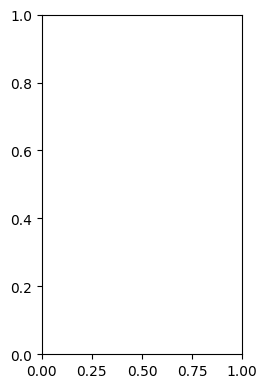

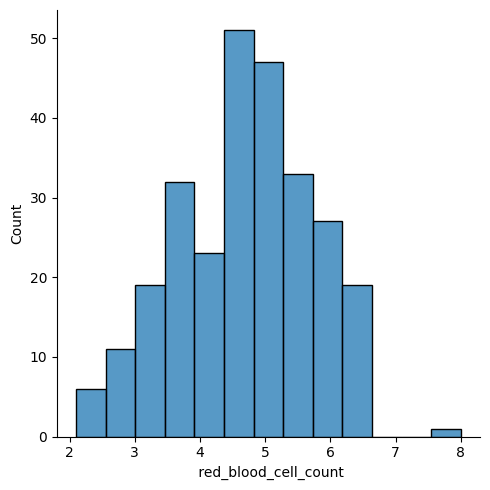

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

df["diabetes_mellitus"].replace(to_replace={'\tno':"no",'\tyes':"yes",'yes':"yes"},inplace=True)
df["coronary_artery_disease"].replace(to_replace={'\tno':"no"},inplace=True)
df["class"].replace(to_replace={'ckd\t':"ckd"},inplace=True)
df["class"]=df["class"].map({"ckd":0,"notckd":1})
plt.figure(figsize=(15,15))
plotnumber=1

for col in num_cols:
    if plotnumber>=14:
        ax=plt.subplot(3,5,plotnumber)
        sns.displot(df[col])
        plt.xlabel(col)
    plotnumber+=1

plt.tight_layout()
plt.show()


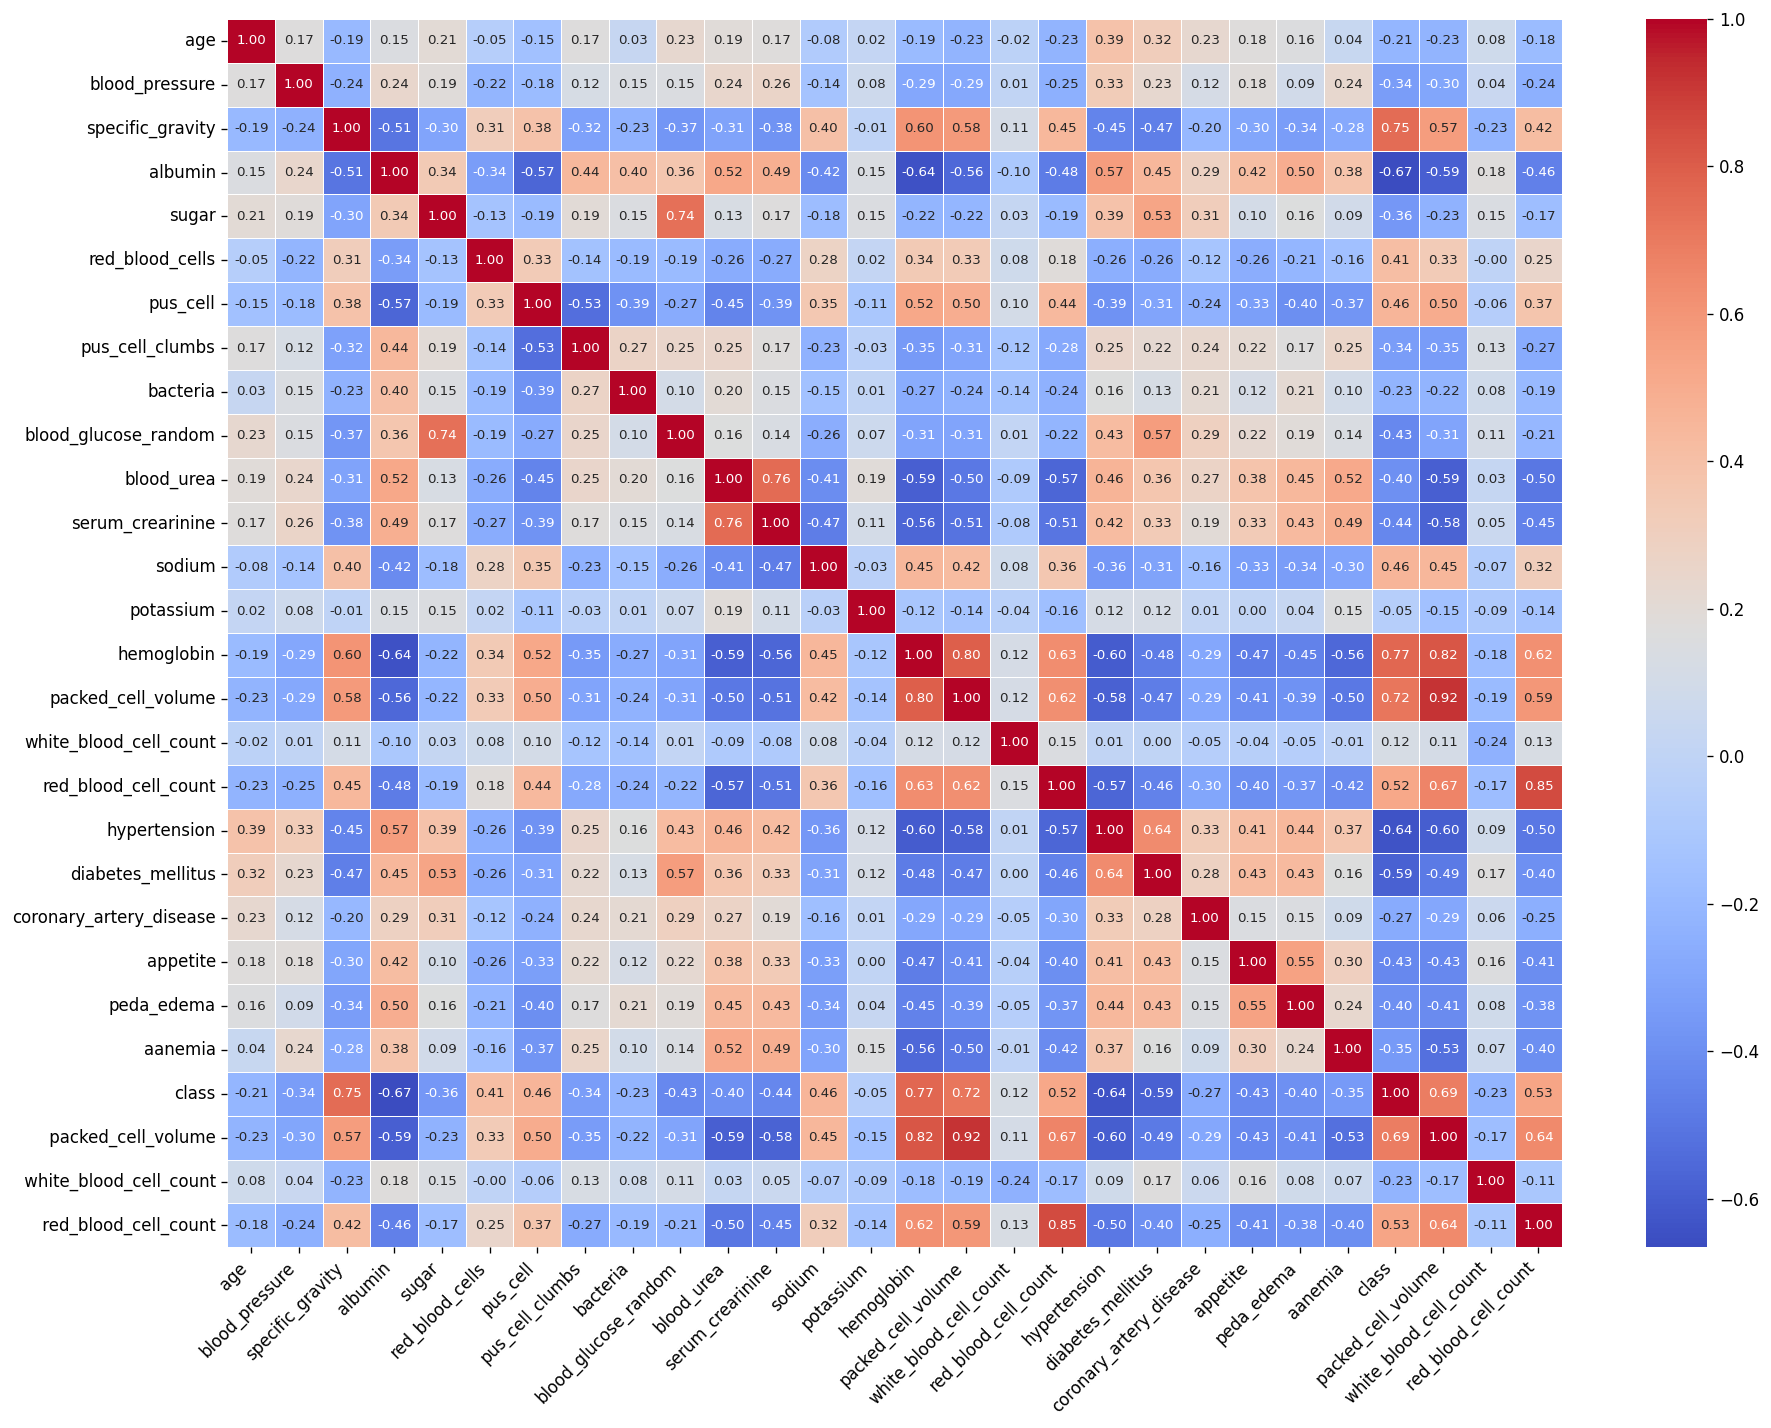

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Kategorik değişkenleri sayısal hale getir
df_encoded = df.copy()
label_encoder = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Grafik çözünürlüğünü artır
plt.figure(figsize=(16, 12), dpi=120)  # dpi arttı

# Isı haritası
sns.heatmap(df_encoded.corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linecolor="white",
            linewidths=0.5,
            annot_kws={"size": 8})  # Sayıların boyutunu da ayarladık

# Ekseni döndür
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()  # Taşmaları engeller
plt.show()




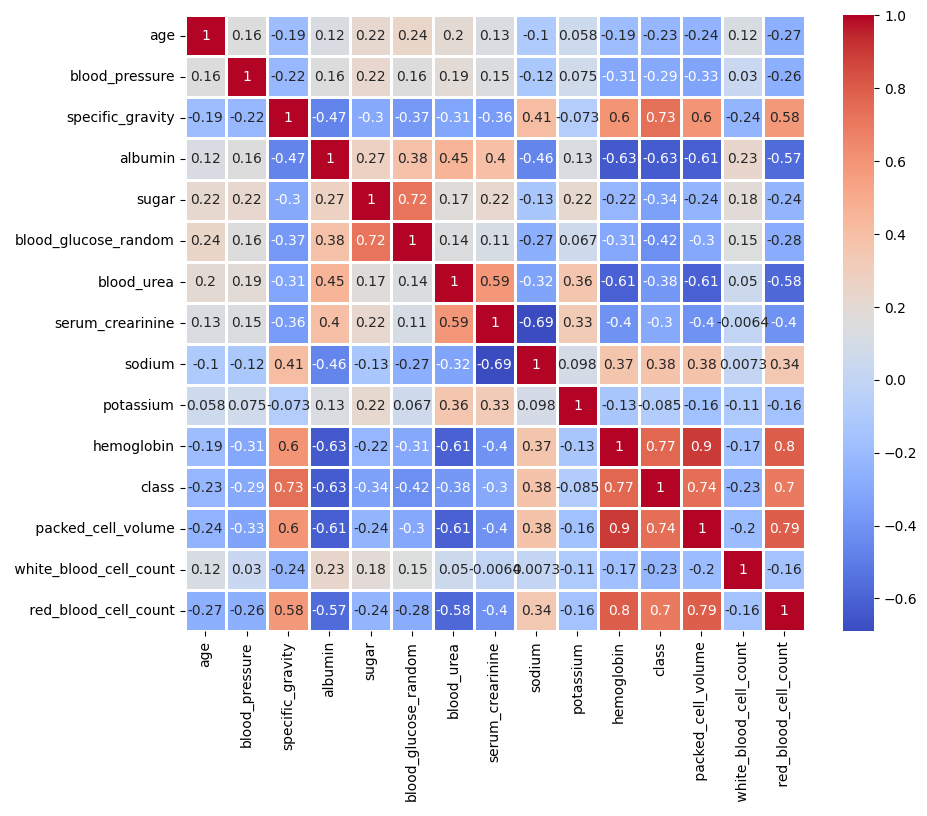

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, linecolor="white", linewidths=2, cmap="coolwarm")
plt.show()


In [ ]:
print(df.columns)  # DataFrame sütunlarını yazdır


Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumbs', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_crearinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class', ' packed_cell_volume',
       ' white_blood_cell_count', ' red_blood_cell_count'],
      dtype='object')


In [ ]:
df.dropna(subset=["class"], inplace=True)  # Doğru sütun adı kullanıldı
df["class"] = df["class"].astype(str)  # class yerine classification sütunu kullanıldı


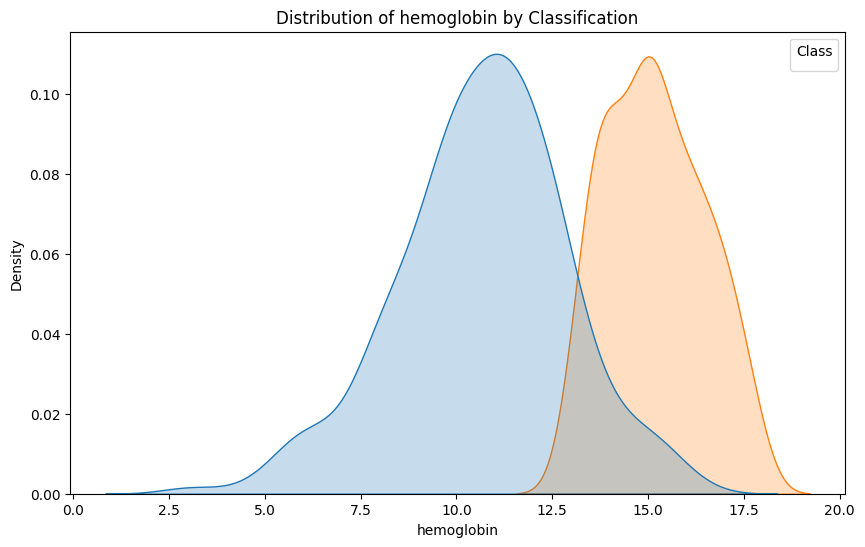

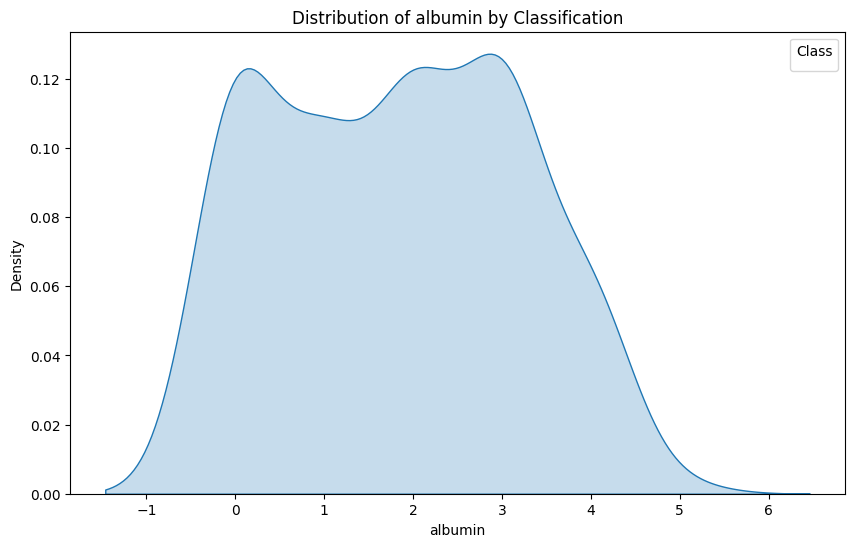

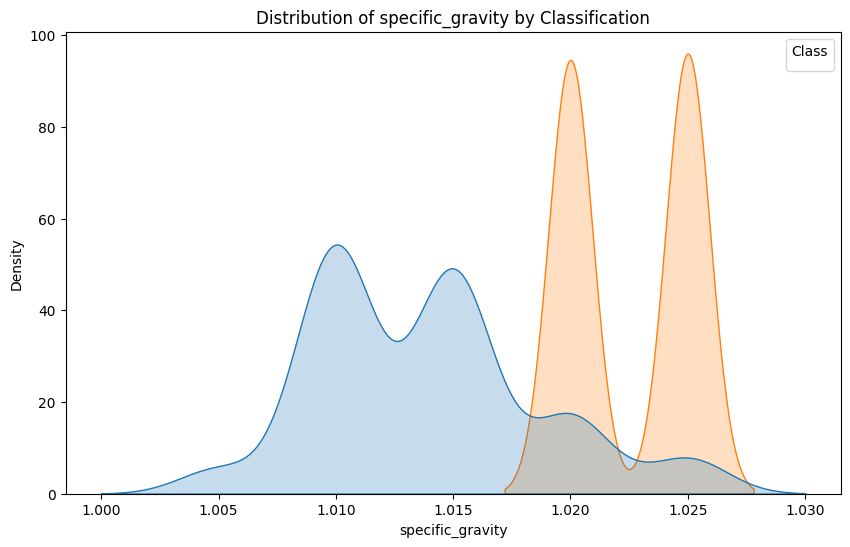

In [ ]:
def kde(col):
    # Eksik verileri temizle
    df.dropna(subset=[col, "class"], inplace=True)

    plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarladık
    sns.kdeplot(data=df, x=col, hue="class", fill=True)
    plt.legend(title="Class")
    plt.xlabel(col)
    plt.title(f"Distribution of {col} by Classification")
    plt.show()

# Örnek olarak hemoglobin ile çizim yapalım
kde("hemoglobin")
kde("albumin")
kde("specific_gravity")




In [ ]:
print(df.columns)

df.isna().sum().sort_values(ascending=False)
def solve_mv_random_value(feature):
    random_sample=df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample
for col in num_cols:
    solve_mv_random_value(col)
df[num_cols].isnull().sum()

def solve_mv_mode(feature):
    mode=df[feature].mode()[0]
    df[feature]=df[feature].fillna(mode)
solve_mv_random_value("red_blood_cells")
solve_mv_random_value("pus_cell")
for col in cat_cols:
    solve_mv_mode(col)
df[cat_cols].isnull().sum()

for col in cat_cols:
    print(f"{col}:{df[col].nunique()}")
encoder=LabelEncoder()
for col in cat_cols:
    df[col]=encoder.fit_transform(df[col])



Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumbs', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_crearinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class', ' packed_cell_volume',
       ' white_blood_cell_count', ' red_blood_cell_count'],
      dtype='object')
red_blood_cells:2
pus_cell:2
pus_cell_clumbs:2
bacteria:2
packed_cell_volume:40
white_blood_cell_count:91
red_blood_cell_count:46
hypertension:2
diabetes_mellitus:2
coronary_artery_disease:2
appetite:2
peda_edema:2
aanemia:2
class:2


In [ ]:
independent_col=[col for col in df.columns if col!="class"]
dependent_col="class"
X=df[independent_col]
y=df[dependent_col]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train,y_train)

y_pred=dtc.predict(X_test)
dtc_acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion matrix:",cm)
print("classification_report:",cr)


Confusion matrix: [[54  1]
 [ 0 39]]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.97      1.00      0.99        39

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



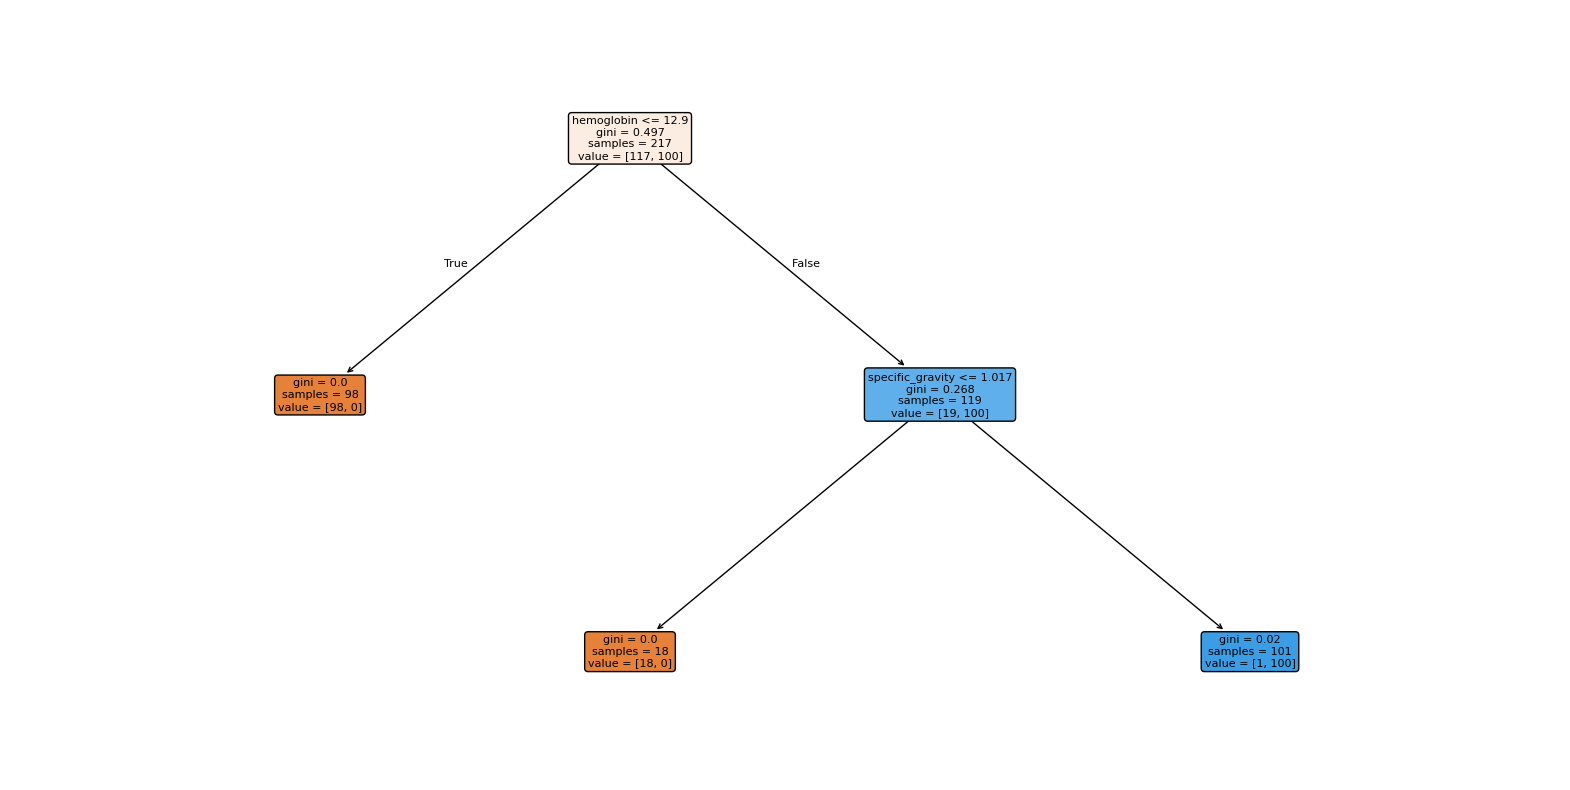

In [ ]:
class_names=["ckd","notckd"]
plt.figure(figsize=(20,10))
plot_tree(dtc,feature_names=independent_col,filled=True,rounded=True,fontsize=8)
plt.show()

Most important feature: Feature       hemoglobin
Importance      0.717039
Name: 14, dtype: object


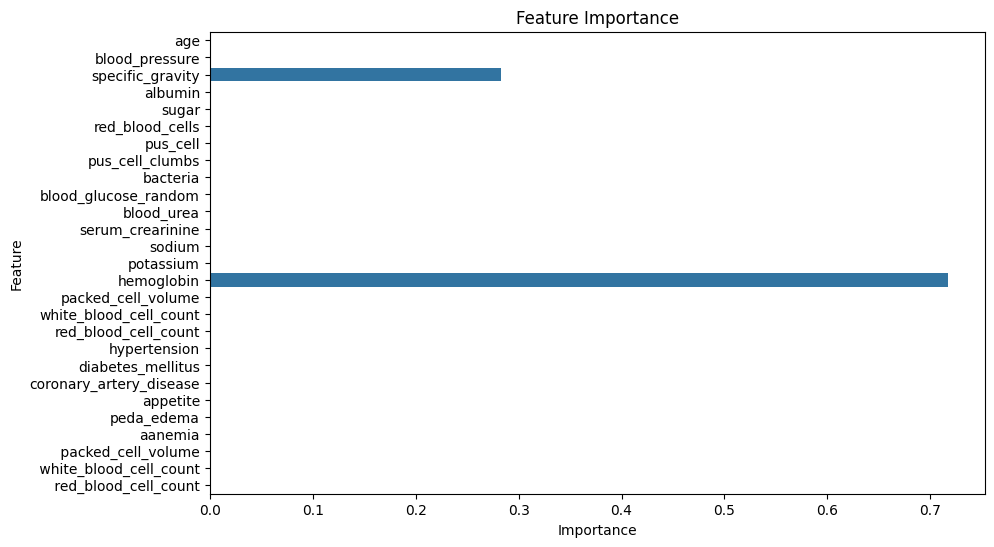

In [ ]:

# Feature importance hesaplama
feature_importance = pd.DataFrame({
    "Feature": independent_col,  # Bağımsız değişkenlerin isimleri
    "Importance": dtc.feature_importances_  # Doğru özellik adı (sondaki "s" harfi önemli!)
})

# En önemli özelliği yazdır
print("Most important feature:", feature_importance.sort_values(by="Importance", ascending=False).iloc[0])

# Feature importance grafiği çizme
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()
